In [3]:
from functools import partial
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer
from scipy.optimize import curve_fit
import seaborn as sns

import src.beam_functions as BF
import src.spherical_harmonics as SH
import src.forward_model as FM
import src.sky_models as SM
import src.map_making as MM
import src.plotting as PL
from src.blockmat import BlockMatrix, BlockVector
from anstey.generate import T_CMB

RS = SH.RealSphericalHarmonics()

In [50]:
narrowcos = lambda x: BF.beam_cos(x, 0.8)
mat_A, (mat_G, mat_P, mat_Y, mat_B) = FM.calc_observation_matrix_zenith_driftscan(nside=8, lmax=8, lat=-26, times=np.linspace(0, 24, 100, endpoint=False), beam_use=narrowcos, return_mat=True)


successfully loaded spherical_harmonic_matrix npix, nalm : 768 45


11.545463149107283


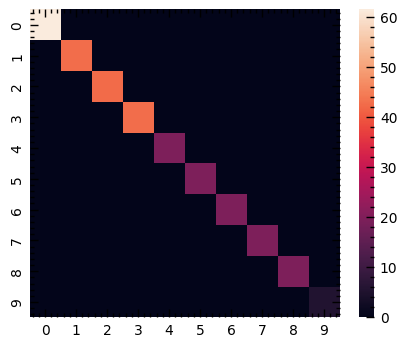

In [38]:
# Trivial obs
prod = mat_B.T @ mat_Y.T @ mat_Y @ mat_B
sns.heatmap(prod[:10,:10])
print(np.linalg.cond(prod[:10,:10]))

898236.5367299878


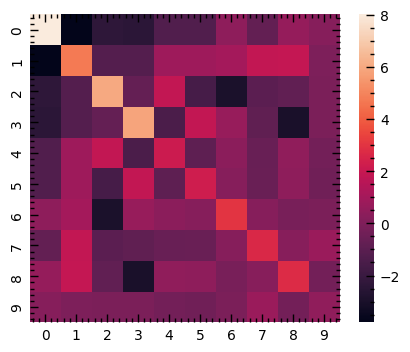

In [39]:
# Nontrivial obs
prod = mat_B.T @ mat_Y.T @ mat_P.T @ mat_P @ mat_Y @ mat_B
sns.heatmap(prod[:10,:10])
print(np.linalg.cond(prod[:10,:10]))

<Axes: >

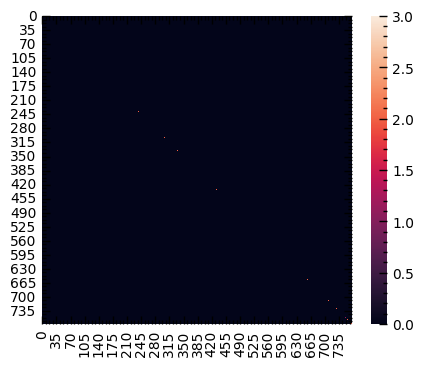

In [40]:
prod = mat_P.T @ mat_P
sns.heatmap(prod)

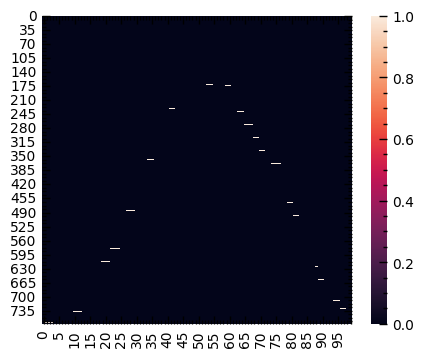

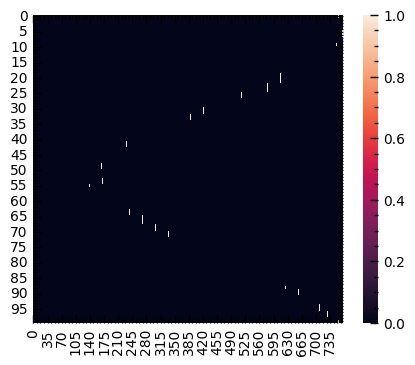

In [41]:
sns.heatmap(mat_P.T)
plt.show()
sns.heatmap(mat_P)
plt.show()

In [51]:
print("effect of B's decreasing blm coefficients")
print("lmax=nside=8 : 1/condition number of Y.T @ Y: ",1/np.linalg.cond(mat_Y.T @ mat_Y))
print("lmax=nside=8 : 1/condition number of B.T @ Y.T @ Y @ B: ",1/np.linalg.cond(mat_B.T @ mat_Y.T @ mat_Y @ mat_B))

effect of B's decreasing blm coefficients
1/condition number of Y.T @ Y:  0.9557822476531098
1/condition number of B.T @ Y.T @ Y @ B:  8.498238930857518e-06


In [52]:
mat_A, (mat_G, mat_P, mat_Y, mat_B) = FM.calc_observation_matrix_zenith_driftscan(nside=32, lmax=32, lat=-26, times=np.linspace(0, 24, 100, endpoint=False), beam_use=narrowcos, return_mat=True)
print("effect of B's decreasing blm coefficients")
print("lmax=nside=32 : 1/condition number of Y.T @ Y: ",1/np.linalg.cond(mat_Y.T @ mat_Y))
print("lmax=nside=32 : 1/condition number of B.T @ Y.T @ Y @ B: ",1/np.linalg.cond(mat_B.T @ mat_Y.T @ mat_Y @ mat_B))

successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561
effect of B's decreasing blm coefficients
lmax=nside=32 : 1/condition number of Y.T @ Y:  0.9680574474858374
lmax=nside=32 : 1/condition number of B.T @ Y.T @ Y @ B:  9.564344284025575e-11


In [54]:

mat_A, (mat_G, mat_P, mat_Y, mat_B) = FM.calc_observation_matrix_multi_zenith_driftscan(nside=32, lmax=32, lats=np.linspace(-80, 80, 100), times=np.linspace(0, 24, 100, endpoint=False), beam_use=narrowcos, return_mat=True)
print("effect of B's decreasing blm coefficients")
print("lmax=nside=32 : 1/condition number of Y.T @ Y: ",1/np.linalg.cond(mat_Y.T @ mat_Y))
print("lmax=nside=32 : 1/condition number of B.T @ Y.T @ Y @ B: ",1/np.linalg.cond(mat_B.T @ mat_Y.T @ mat_Y @ mat_B))

effect of B's decreasing blm coefficients
lmax=nside=32 : 1/condition number of Y.T @ Y:  0.9680574474858374
lmax=nside=32 : 1/condition number of B.T @ Y.T @ Y @ B:  9.564344284025575e-11


<Axes: >

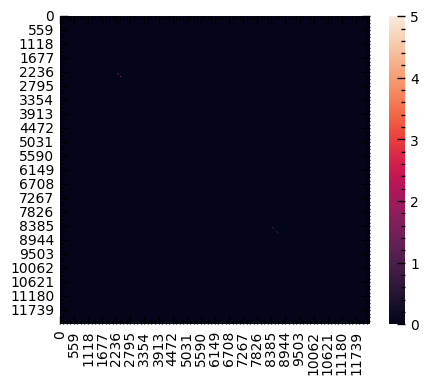

In [55]:
prod = mat_P.T @ mat_P
sns.heatmap(prod)